`GRIP-The Sparks Foundation`

`Data Science and Business Analytics Intern`

`Author: Azmat Sohal`

`Task 4:
Perform Exploratory Data Analysis on dataset Global Terrorism
As a security/defense analyst, try to find out the hot zone of terrorism.`

`Importing the required libraries`

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns

In [59]:
#reading the data
data=pd.read_csv('task4.csv' ,low_memory=False)

In [60]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [61]:
# number of rows and columns of data
data.shape

(181691, 135)

In [62]:
#columns of data
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [63]:
#information regarding dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


`Cleaning the data`

In [64]:
#finding the null values
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [65]:
data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


<AxesSubplot:>

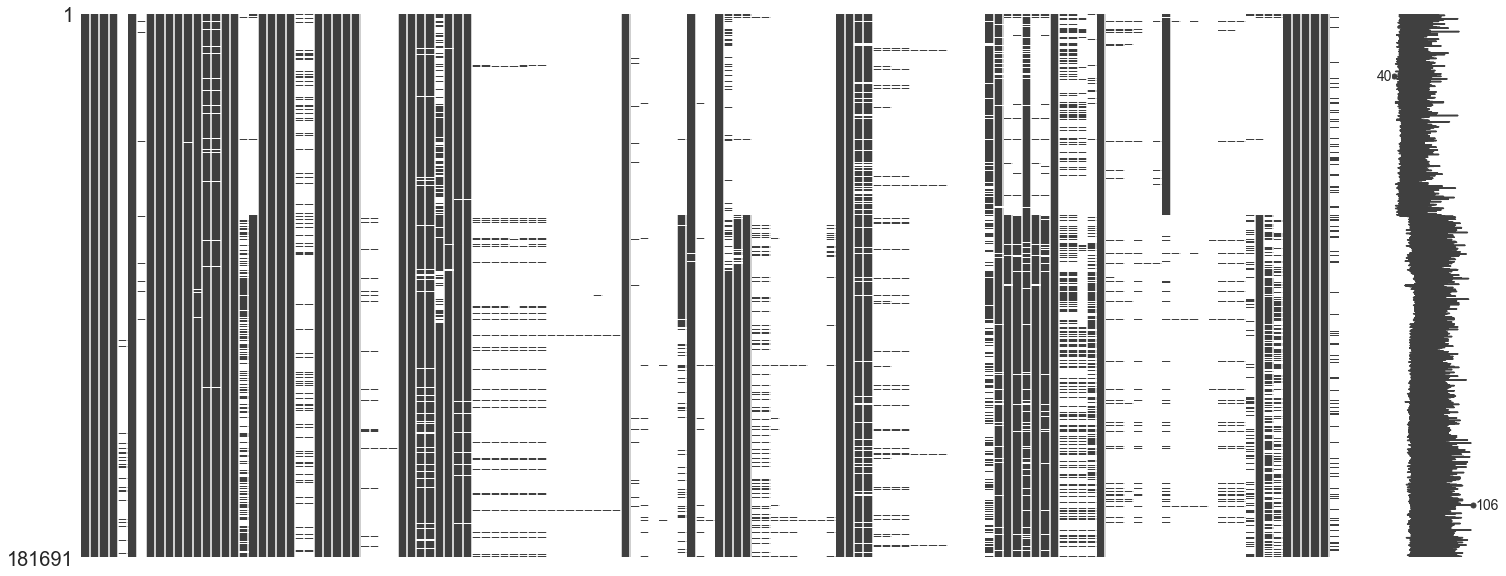

In [66]:
#plotting the matrix of null values in data
import missingno as mn
mn.matrix(data)

In [67]:
data['related'].isnull().sum()

156653

In [68]:
data['nreleased'].isnull().sum()

171291

In [69]:
data['addnotes'].isnull().sum()

153402

` Dropping all the columns whose null values are greater than 150000`

In [70]:
data.drop(data.columns[data.isna().sum()> 150000], axis=1, inplace=True)

In [71]:
data

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,ishostkid,ransom,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,0.0,0.0,NaN,NaN,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,1.0,1.0,NaN,NaN,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,0.0,0.0,NaN,NaN,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,0.0,0.0,NaN,NaN,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,0.0,0.0,NaN,NaN,NaN,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,0.0,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,0.0,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,0.0,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,0.0,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9


In [72]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1',
       'crit2', 'crit3', 'doubtterr', 'multiple', 'success', 'suicide',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1',
       'natlty1_txt', 'gname', 'motive', 'guncertain1', 'individual', 'nperps',
       'nperpcap', 'claimed', 'weaptype1', 'weaptype1_txt', 'weapsubtype1',
       'weapsubtype1_txt', 'weapdetail', 'nkill', 'nkillus', 'nkillter',
       'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propvalue', 'propcomment', 'ishostkid', 'ransom',
       'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')

In [73]:
#assigning the specified columns to data
data=data[["iyear", "imonth", "iday","country", "country_txt", "region_txt", "city","success", "attacktype1_txt","nkill",
 "propvalue", "targtype1_txt","latitude","gname","longitude", "targsubtype1_txt","target1","weaptype1_txt", "weapdetail"]]

In [74]:
data.columns

Index(['iyear', 'imonth', 'iday', 'country', 'country_txt', 'region_txt',
       'city', 'success', 'attacktype1_txt', 'nkill', 'propvalue',
       'targtype1_txt', 'latitude', 'gname', 'longitude', 'targsubtype1_txt',
       'target1', 'weaptype1_txt', 'weapdetail'],
      dtype='object')

In [75]:
#finding the null values in new data
data.isnull().sum()

iyear                    0
imonth                   0
iday                     0
country                  0
country_txt              0
region_txt               0
city                   434
success                  0
attacktype1_txt          0
nkill                10313
propvalue           142702
targtype1_txt            0
latitude              4556
gname                    0
longitude             4557
targsubtype1_txt     10373
target1                636
weaptype1_txt            0
weapdetail           67670
dtype: int64

<AxesSubplot:>

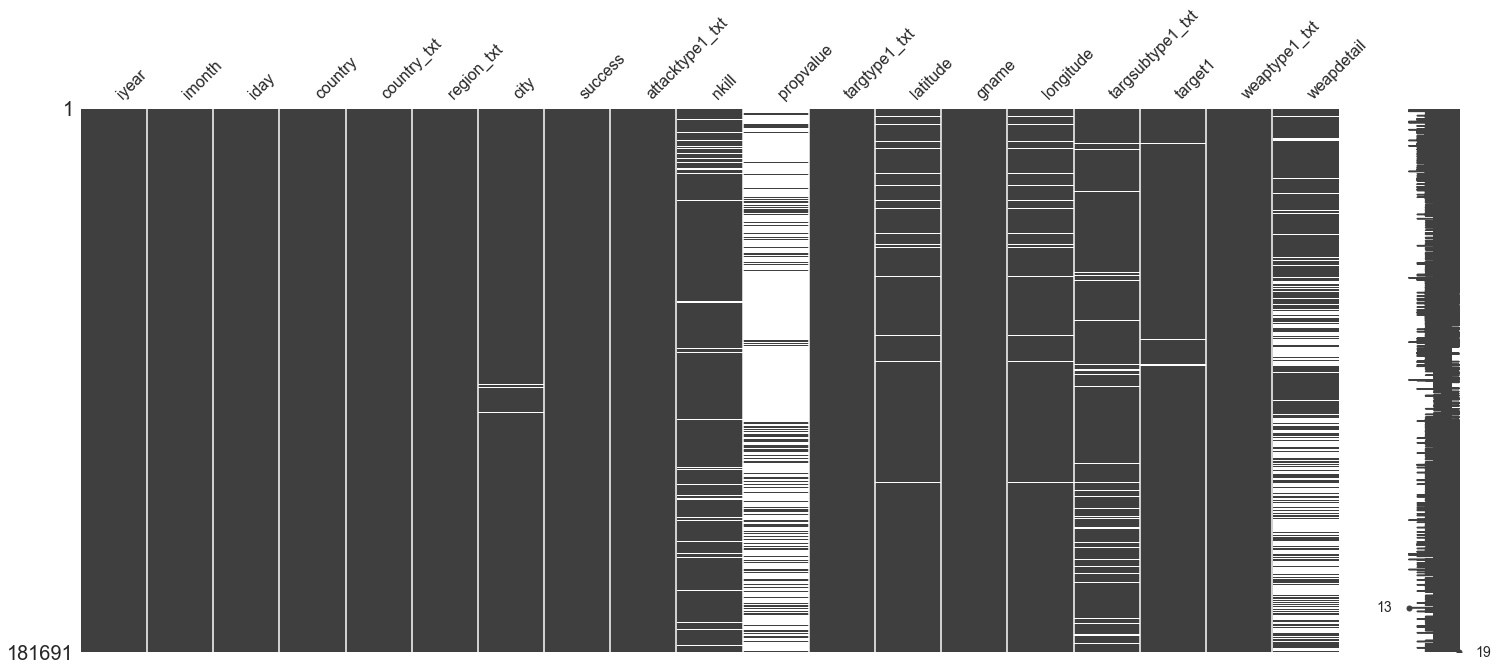

In [76]:
mn.matrix(data)

In [77]:
#filling the null values present in data
data["city"].fillna("Unknown", inplace = True)
data["targsubtype1_txt"].fillna("Unknown", inplace = True)
data["propvalue"].fillna(0, inplace = True)
data["nkill"].fillna(0, inplace = True)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4460: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [78]:
#finding the country, region and maximum people killed in attack
print('Country with Highest Terrorist Attacks:',data['country_txt'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',data['region_txt'].value_counts().index[0])
print('Maximum people killed in an attack are:',data['nkill'].max(),'that took place in',data.loc[data['nkill'].idxmax()].country_txt)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


`Top 5 cities of maximum attack`

In [79]:

cityda=data.groupby('city')['nkill'].count().sort_values(ascending=False).to_frame()
print(cityda.head(5))

         nkill
city          
Unknown  10209
Baghdad   7589
Karachi   2652
Lima      2359
Mosul     2265


In [80]:
#information regarding data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             181691 non-null  int64  
 1   imonth            181691 non-null  int64  
 2   iday              181691 non-null  int64  
 3   country           181691 non-null  int64  
 4   country_txt       181691 non-null  object 
 5   region_txt        181691 non-null  object 
 6   city              181691 non-null  object 
 7   success           181691 non-null  int64  
 8   attacktype1_txt   181691 non-null  object 
 9   nkill             181691 non-null  float64
 10  propvalue         181691 non-null  float64
 11  targtype1_txt     181691 non-null  object 
 12  latitude          177135 non-null  float64
 13  gname             181691 non-null  object 
 14  longitude         177134 non-null  float64
 15  targsubtype1_txt  181691 non-null  object 
 16  target1           18

`Plotting the attack count`

<AxesSubplot:title={'center':'Attack Count by year'}, xlabel='iyear', ylabel='count'>

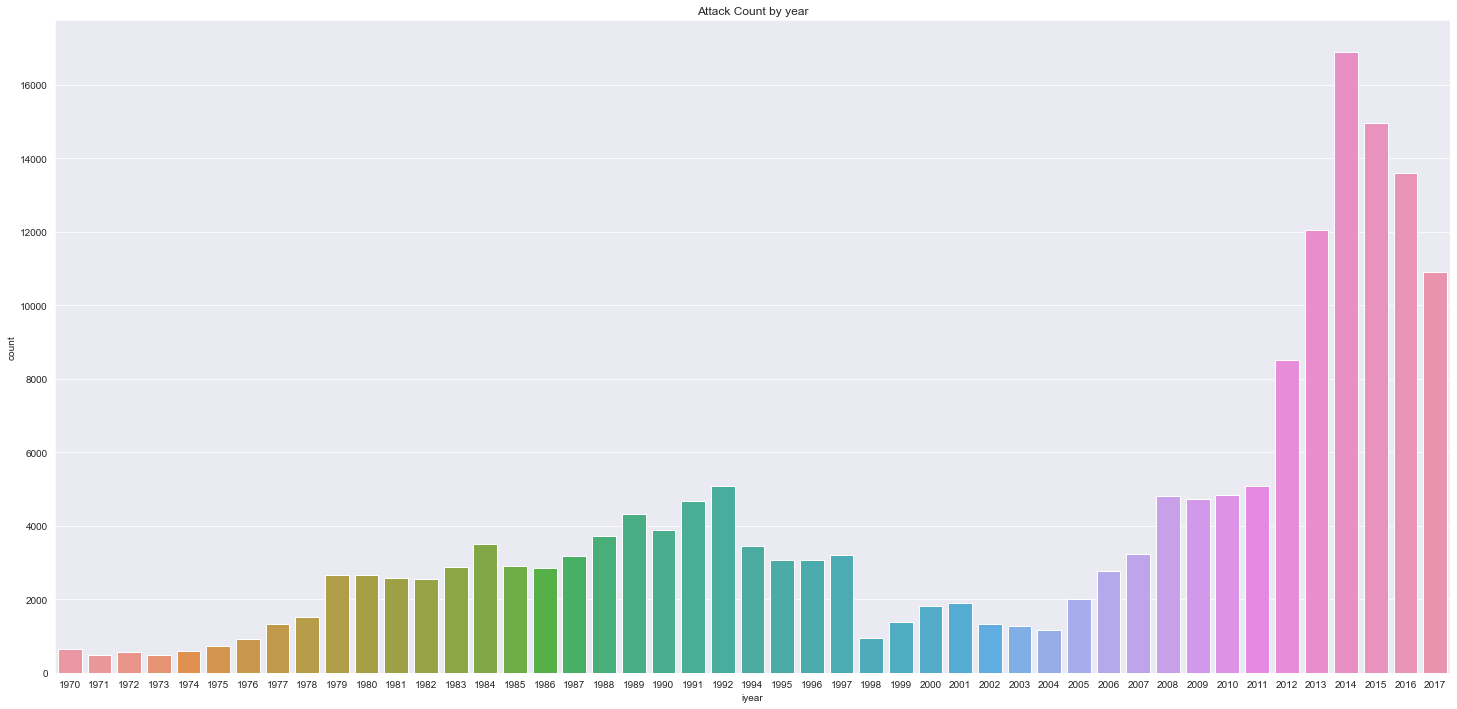

In [81]:
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.figure(figsize=(25,12))   #  Incresing figure size...
plt.title("Attack Count by year")  # Giving title to the graph...
sns.countplot(x ='iyear', data = data)

`It is visible that maximum attack took place in 2014`

`Plotting the success of attacks`

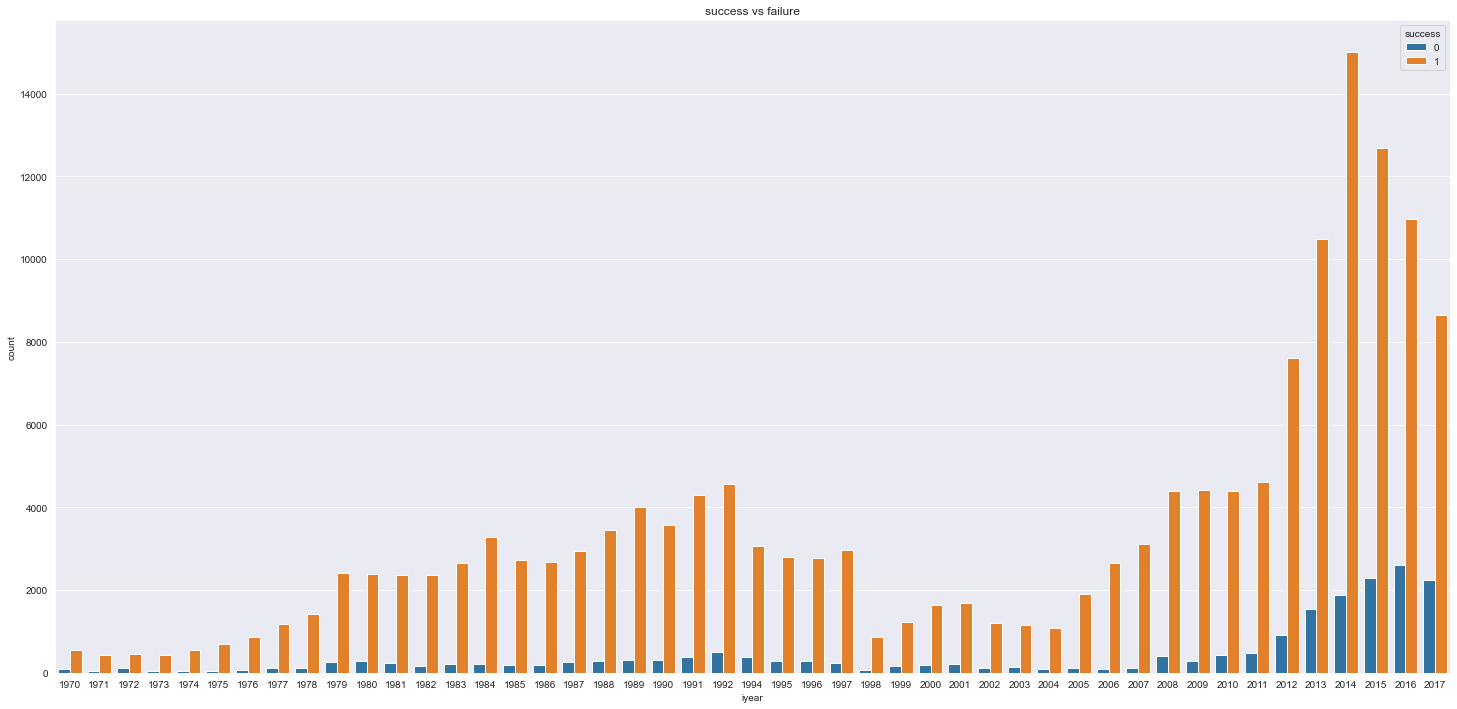

In [82]:
plt.figure(figsize=(25,12))
plt.title("success vs failure")
sns.countplot(x='iyear' ,hue="success", data=data)
plt.show()

`It is visible that 2013 to 2017 the success rate increased`

`Region wise attack`

<AxesSubplot:title={'center':'Region wise attack'}, xlabel='region_txt', ylabel='count'>

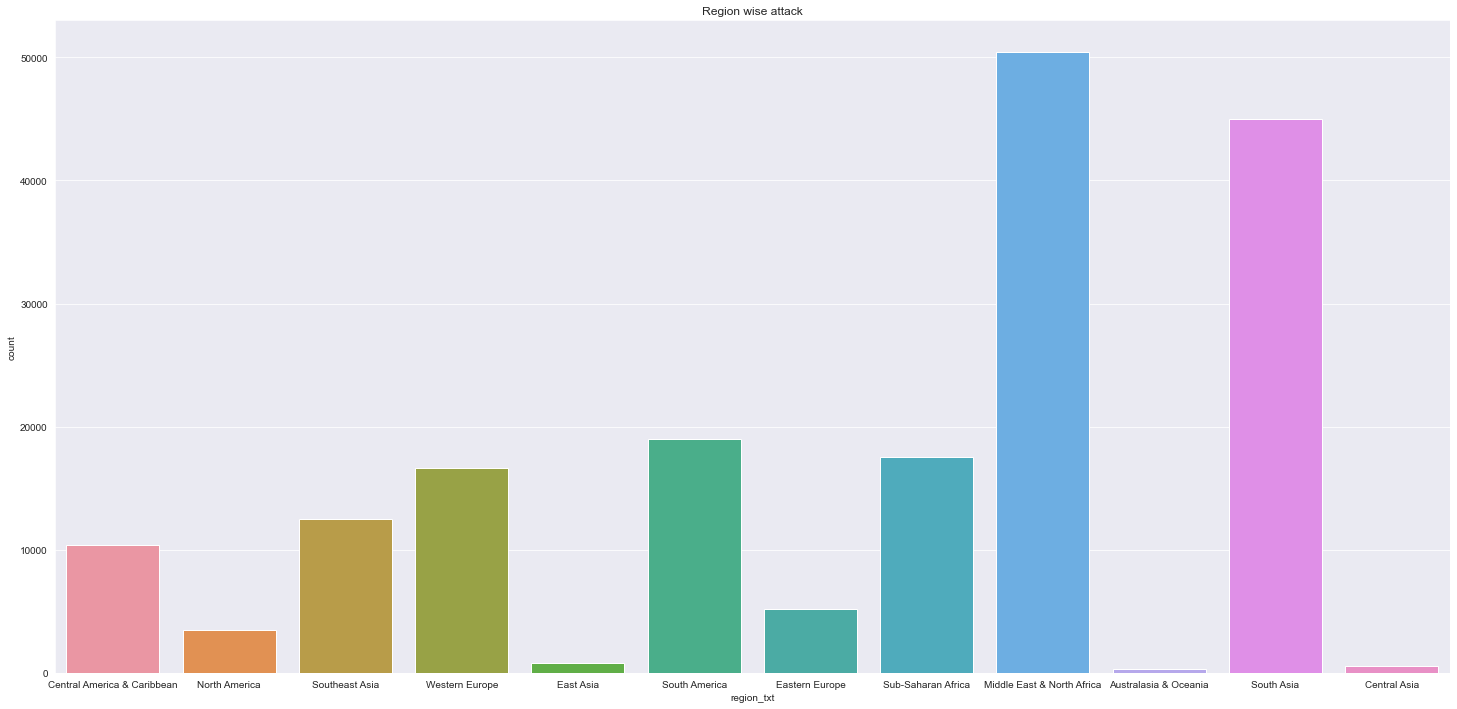

In [83]:
plt.figure(figsize=(25,12))
sns.set_style('darkgrid')
plt.title('Region wise attack')
sns.countplot(x='region_txt' ,data=data)

`Middle East and north Africa and south asia are the regions of maximum attacks`

`visualization of attacktype according to regions`

<AxesSubplot:title={'center':'country wise attack'}, xlabel='region_txt', ylabel='count'>

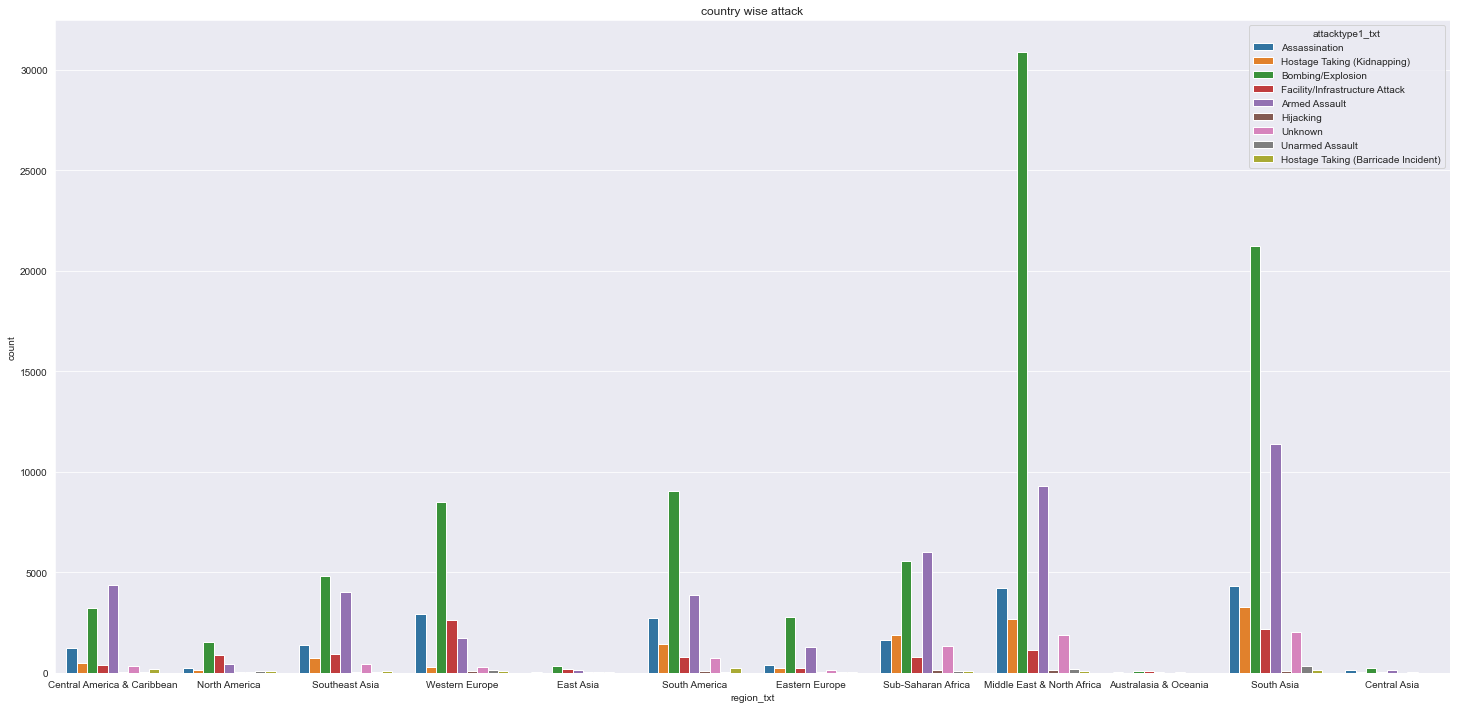

In [84]:
plt.figure(figsize=(25,12))
sns.set_style('darkgrid')
plt.title("country wise attack")
sns.countplot(x='region_txt' ,hue='attacktype1_txt', data=data)

`It is visible that maximum types of attacks are bomb explosions and armed assault according to regions`

`Target types of these attacks`

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


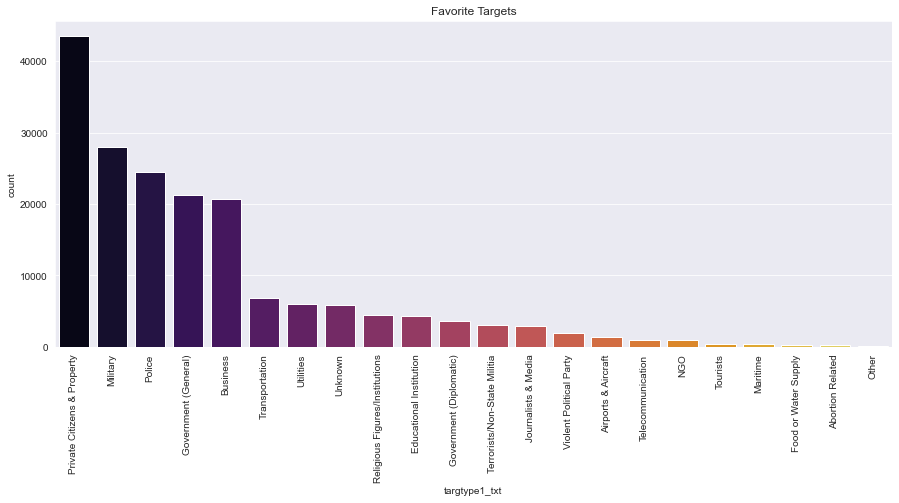

In [85]:
plt.subplots(figsize=(15,6))
sns.countplot(data['targtype1_txt'],palette='inferno',order=data['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

`It is clear that private citizens and property , military and police are the main targets of these attacks`

`Weapons used to carry out these attacks`

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


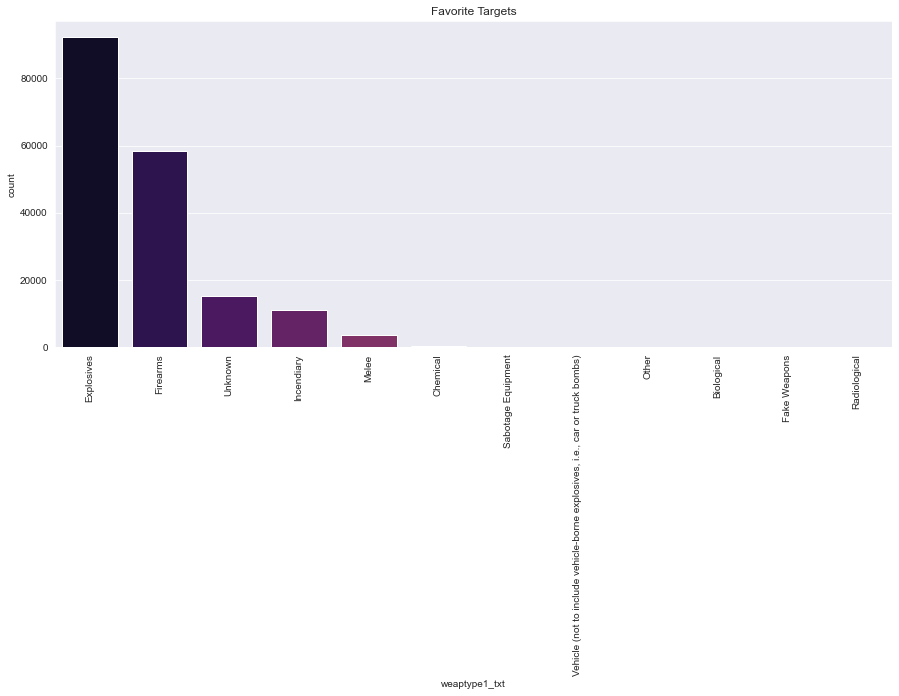

In [86]:
plt.subplots(figsize=(15,6))
sns.countplot(data['weaptype1_txt'],palette='inferno',order=data['weaptype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

`Explosives and firearms are the common weapons uses in these attacks`

`Groups that carry out these attacks`

In [87]:
groups=data.groupby('gname')['nkill'].count().sort_values(ascending=False).to_frame()
print(groups.head(5))
group=groups.head(5)

                                                  nkill
gname                                                  
Unknown                                           82782
Taliban                                            7478
Islamic State of Iraq and the Levant (ISIL)        5613
Shining Path (SL)                                  4555
Farabundo Marti National Liberation Front (FMLN)   3351


`Hot zones of attacks`

`It is visible that the Middle-East and Southern-Asia are the regions with highest terrorist activites, not only in numbers, but also in casualities.
It is spreading largely across the globe but in the past few years, India, 
Pakistan and Afghanistan have witnessed an increase in such number of activities.`